#Header 1

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("apcdata_week.csv",index_col = 0)

#What is the stop_name where the most people got on?

In [3]:
data['stop_name'][data['ons']==data['ons'].max()]

index
76553             HAMILTON E HOLMES STATION
928420    COLLEGE PARK STATION - SOUTH LOOP
Name: stop_name, dtype: object

What is the stop_name where the most people got off?

In [4]:
data['stop_name'][data['offs']==data['offs'].max()]


index
331567    LINDBERGH CENTER STATION
Name: stop_name, dtype: object

#Which direction has the highest passenger traffic? (Passenger traffic is determined by the sum of the number of people getting on at any stop along a route in a given direction)

In [6]:
x = data.groupby(data['direction']).sum()
x['ons'][x['ons']==x['ons'].max()].index[0]

'Northbound'

Which direction has the lowest passenger traffic?

In [134]:
x['ons'][x['ons']==x['ons'].min()].index[0]

'Eastbound'

What is the route_name of the most popular route? (The most popular route is the one with the highest average passenger traffic in either direction.)

In [122]:
route = data.groupby(data['route_name']).sum()[['ons','offs']]
route['avg']=route.mean(axis=1)
route['avg'][route['avg']==route['avg'].max()].index[0]

'39: Buford Highway'

Which date has the highest passenger traffic?

In [120]:
datedf= data.groupby(data['date']).sum()
datedf[datedf['ons']==datedf['ons'].max()].index[0]

'7/1/2016'

Which date has the lowest passenger traffic?


In [144]:
datedf['ons'][datedf['ons']==datedf['ons'].min()].index[0]

'7/6/2016'

Part 2
System-wide passenger traffic (ons + offs) totals for each date

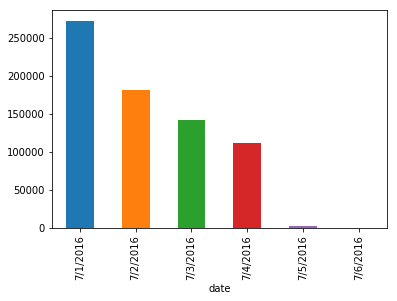

In [148]:
plt.figure()
datedf= data.groupby(data['date']).sum()[['ons','offs']]
datedf['Total'] = datedf.sum(axis=1)
datedf['Total'].plot(kind='bar')

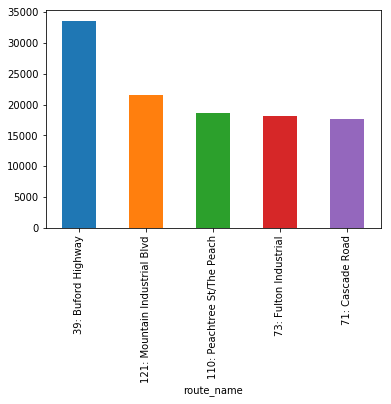

In [147]:
routedf= data.groupby(data['route_name']).sum()[['ons','offs']]
routedf['Total'] = routedf.sum(axis=1)
routedf = routedf.sort_values(by = 'Total',ascending=False)
routedf['Total'].head(n=5).plot(kind='bar')

How busy is each route compared to the other routes?

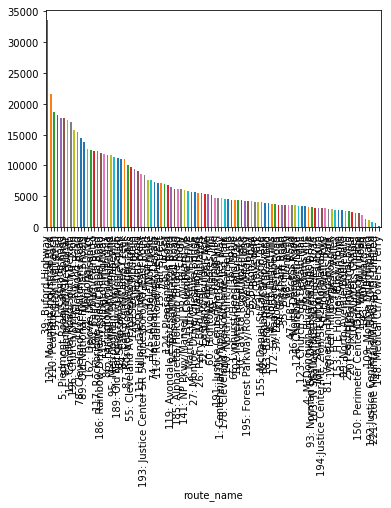

In [150]:
routedf['Total'].plot.bar()

How busy is each direction (north, south, east, west) compared to other directions?

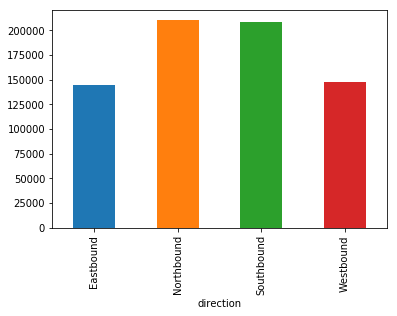

In [151]:
directiondf= data.groupby(data['direction']).sum()[['ons','offs']]
directiondf['Total'] = directiondf.sum(axis=1)
directiondf['Total'].plot(kind='bar')